# Convolutional Neural Network with Keras (Part 1) 

**What is Keras?** Keras is a wrapper that allows you to implement Deep Neural Network without getting into intrinsic details of the Network. It can use *Tensorflow* or *Theano* as backend. 


In this lab you will build a **CNN** (comprised of convolutional layers, pooling layers and fully connected ones) for hand-written digit recognition.

# Importing libraries

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

# Importing Dataset

Here we are loading mnist Dataset which is preloaded in tensorflow. <br>

Calling the `load_data` function on this object returns splitted train and test data in form of (features, target).

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
#train_images = 255. - train_images
#test_images = 255. - test_images

train_images = np.reshape(train_images,[-1, train_images.shape[1], train_images.shape[2], 1])
test_images = np.reshape(test_images,[-1, test_images.shape[1], test_images.shape[2], 1])


# Overview of Dataset

The MNIST dataset contains 70,000 (28 x 28 pixel) grayscale (i.e., black and white) images (of hand-written digits) in 10 classes. The dataset is divided into 60,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.<br>


In [3]:
print(f'Shape of the training data: {train_images.shape}')
print(f'Shape of the training target: {train_labels.shape}')
print(f'Shape of the test data: {test_images.shape}')
print(f'Shape of the test target: {test_labels.shape}')

Shape of the training data: (60000, 28, 28)
Shape of the training target: (60000,)
Shape of the test data: (10000, 28, 28)
Shape of the test target: (10000,)


In [4]:
print(train_labels)

[5 0 4 ... 5 6 8]


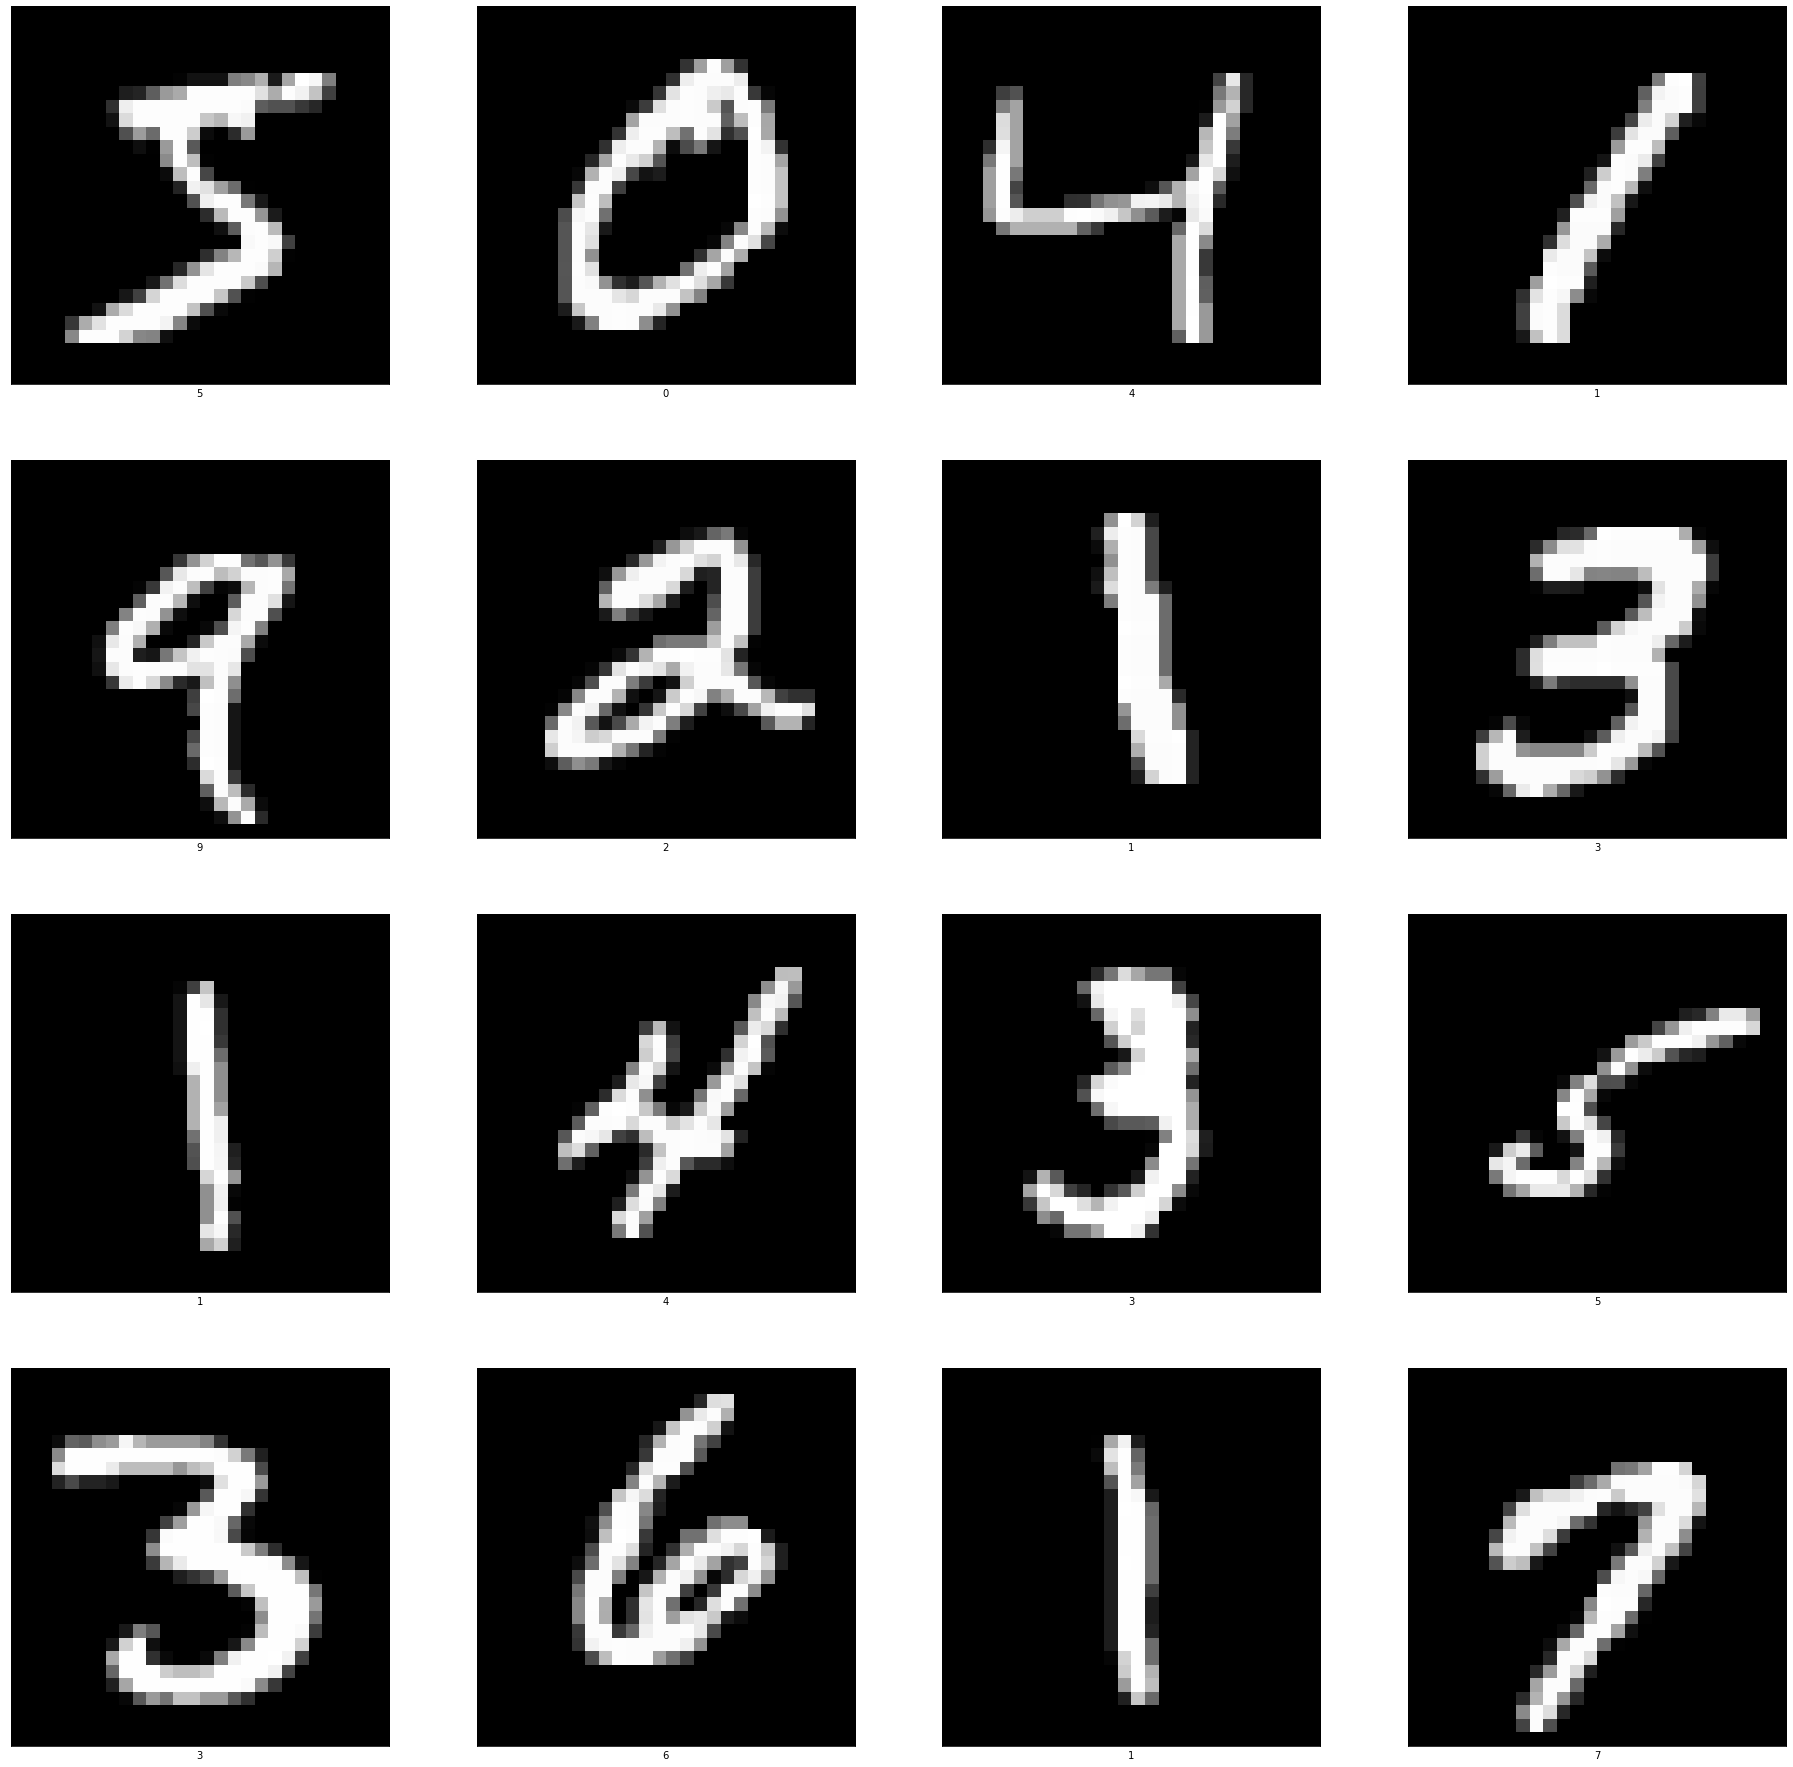

In [3]:
# To verify that the dataset looks correct, let's plot the first 16 images from the training set and display the class name below each image.
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(32,32))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i][:,:,0], cmap=plt.cm.gray)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Preprocessing

Normalizing i.e. scaling the pixels to 0-1 from 0-255.

In [4]:
# Normalizing
train_images, test_images = tf.cast(train_images,tf.float32) / 255.0, tf.cast(test_images,tf.float32) / 255.0


Or alternatively standardizing

In [ ]:
#Standardizing 
import pdb
def standardize(image_data):
        image_data = image_data.astype(float)
        mean = np.mean(image_data, axis=0)
        image_data -= mean
        std = np.std(image_data, axis=0)
        image_data /= std
        return image_data, mean, std

train_images, mean, std =   standardize(train_images)

def standardize_test(image_data, mean, std):
        image_data = image_data.astype(float)
        image_data -= mean
        image_data /= std
        return image_data

test_images =   standardize_test(test_images, mean, std)



# Modelling

There are two types of models in Tensorflow:
 - **Sequential**
 - **Graphical**

## Models
`tf.keras.model.Sequential()` 
lets you create a linear stack of layers providing a Sequential netural network.<br>
`tf.model()`
allows you to create arbitarary graph of layers as long as there is no cycle.

## Flatten Layer
`tf.keras.layers.Flatten()` flattens the input.<br>
For input of `(batch_size, height, width, depth)` the output converts to `(batch_size, height * width * depth)`



## Dense Layer
`tf.keras.layers.Dense()` Normal dense layer (= fully connected layer): each node/neuron in this layer is connected to each node in the input layer. <br>
>The two arguments passes below in dense layer are *units* and *activation* (activation function).<br>
* **units** corresponds to the number of nodes in the layer<br>
* **activation** is an element-wise activation function.
    * **'relu'**: This activation function converts every negative value to 0 and positive remains the same
    * **'softmax'**: This function takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers. The elements of the output vector are in range (0, 1) and sum to 1.
    * **'sigmoid'**: Applies the sigmoid activation function. For small values (<-5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.
    * **'tanh'**: Applies the hyperbolic tangient function. The range of the tanh function is from (-1 to 1).
    * **None**: It means there is no activation function. In other words this layer produces linear output.

## Convolution Layer
`tf.keras.layers.Conv2D()` Convolution layer takes the following argument
> * **filters** Number of different types of convolutions used. Initially they are set to some predefined convolution and slowly trained to find better features in the image.
* **kernel_size** An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
* **strides** An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Default value is (1,1)
* **padding** one of "valid" or "same" (case-insensitive): 
  * **'VALID'**: it means no padding and it assumes that all the dimensions are valid so that the input image gets fully covered by a filter and the stride specified by you.
  * **'SAME'**: it applies padding to the input image so that the input image gets fully covered by the filter and specified stride. It is called SAME because, for stride 1 , the output will be the same as the input. 
* **activation** activation function  (typical options were explained before). Default value is: None
* **use_bias** Boolean, whether the layer uses a bias vector. Default value is: True
* **input_shape** Size of each input to the convolution.

## Pooling
`tf.keras.layers.MaxPooling2D()` Max Pooling layer to reduce the size of the input. This layer takes the following arguments:
> * **pool_size** Dimension of pooling kernel. Default value is (2, 2)
* **strides** Integer, tuple of 2 integers, or None. Strides values. Specifies how far the pooling window moves for each pooling step. Default value is: None
* **padding** One of "valid" or "same" (case-insensitive). "valid" adds no zero padding. "same" adds padding such that if the stride is 1, the output shape is the same as input shape. Default value is "valid".<br>
`tf.keras.layers.AveragePooling2D()` Average Pooling layer to reduce the size of the input.

## Regularazation:

# Dropout
`tf.keras.layers.Dropout()` Applies Dropout to the input.
The Dropout layer randomly sets input units to 0 with a frequency of 'rate' at each step during training time, which helps prevent overfitting. 
It takes the following argument:
> * **rate**: Float between 0 and 1. Fraction of the input units to drop.

## Compiling model
`model.compile()` Sets up the optimiser, loss and metrics configuration.
> * **optimizer**: updates the parameter of the Neural Network.
* **loss**: Measures the error in our model.
* **metrics**: Used to judge the model. The difference between metrics and loss is that metrics in not used to evaluate the model while training, whereas loss evaluates the model error while training and helps optimizer reduce the error.

# Creating the Model-Architecture

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size; color_channels refer to (R,G,B). 
In this example, we will configure our CNN to process inputs of shape (28, 28, 1), which is the format of MNIST images. We can do this by passing the argument input_shape to our first layer. </br>
**Note** We only pass the argument input_shape to the first layer of the architecture. We do not have to pass it to any other layer.

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), padding = 'SAME', activation='relu', input_shape=(train_images.shape[1], train_images.shape[2], train_images.shape[3])))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(tf.keras.layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding = 'SAME', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(tf.keras.layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding = 'SAME', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())

model.add(layers.Dense(10, activation='softmax'))

# as metric we choose the accuracy: the total number of correct predictions made
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])



## Model details

Let's look at details of the model.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

## Training

```model.fit``` trains the model.
> * **train_images**: Training data/features
* **train_labels**: Target
* **epochs**: Number of times the entire dataset is fed in the model. In other words, one forward pass and one backward pass of all the training examples.
* **batch size**: Number of images that will be fed to the network at each iteration for optimizing. In other words, the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.



Epoch 1/20
235/235 [==============================] - 1s 6ms/step - loss: 0.3337 - accuracy: 0.9066 - val_loss: 0.0732 - val_accuracy: 0.9771
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0710 - accuracy: 0.9786 - val_loss: 0.0513 - val_accuracy: 0.9851
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0525 - accuracy: 0.9839 - val_loss: 0.0462 - val_accuracy: 0.9846
Epoch 4/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0395 - accuracy: 0.9874 - val_loss: 0.0398 - val_accuracy: 0.9873
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0335 - accuracy: 0.9895 - val_loss: 0.0355 - val_accuracy: 0.9886
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0275 - accuracy: 0.9915 - val_loss: 0.0330 - val_accuracy: 0.9891
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0230 - accuracy: 0.9930 - val_loss: 0.0311 - val_accuracy: 0.9901
Epoch 

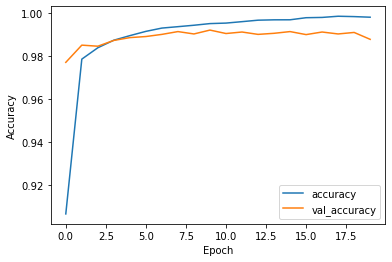

In [7]:
# Training
history = model.fit(train_images, train_labels, epochs=20, batch_size=256, 
                    validation_data=(test_images, test_labels))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [8]:
predictions = model.predict(test_images)
predictions[0]

array([5.3546804e-14, 1.6068761e-12, 3.2975507e-07, 2.1689170e-09,
       1.9010080e-13, 9.9832740e-14, 3.1176414e-23, 9.9999964e-01,
       8.7363875e-12, 1.2261313e-09], dtype=float32)

In [9]:
predictions_index = np.argmax(predictions, axis=1) # Convert one-hot to index; remember indexing starts from 0; index takes integers values in [0,9]
predictions_index

array([7, 2, 1, ..., 4, 5, 6])

## Visualize prediction

Now let's visualize the prediction using the model you just trained. 
First we get the predictions with the model from the test data.
Then we print out 15 images from the test data set, and set the titles with the prediction (and the ground truth label).
If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

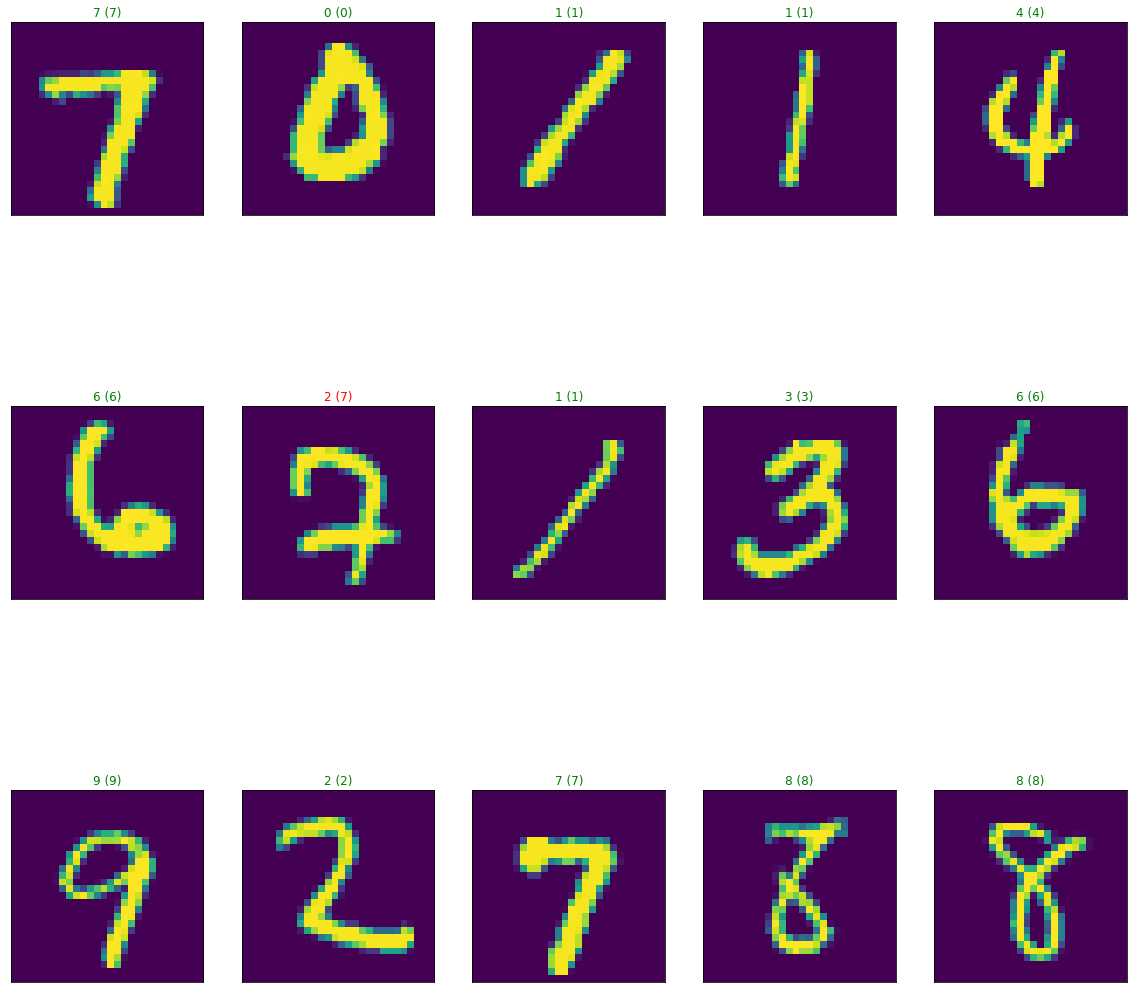

In [10]:
import pdb
y_hat = model.predict(test_images)

# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = test_labels[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# Visualising feature maps

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
Total params: 640
Trainable params: 640
Non-trainable params: 0
_________________________________________________________________


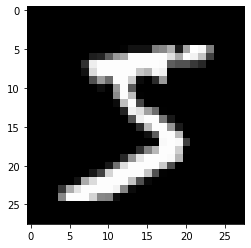

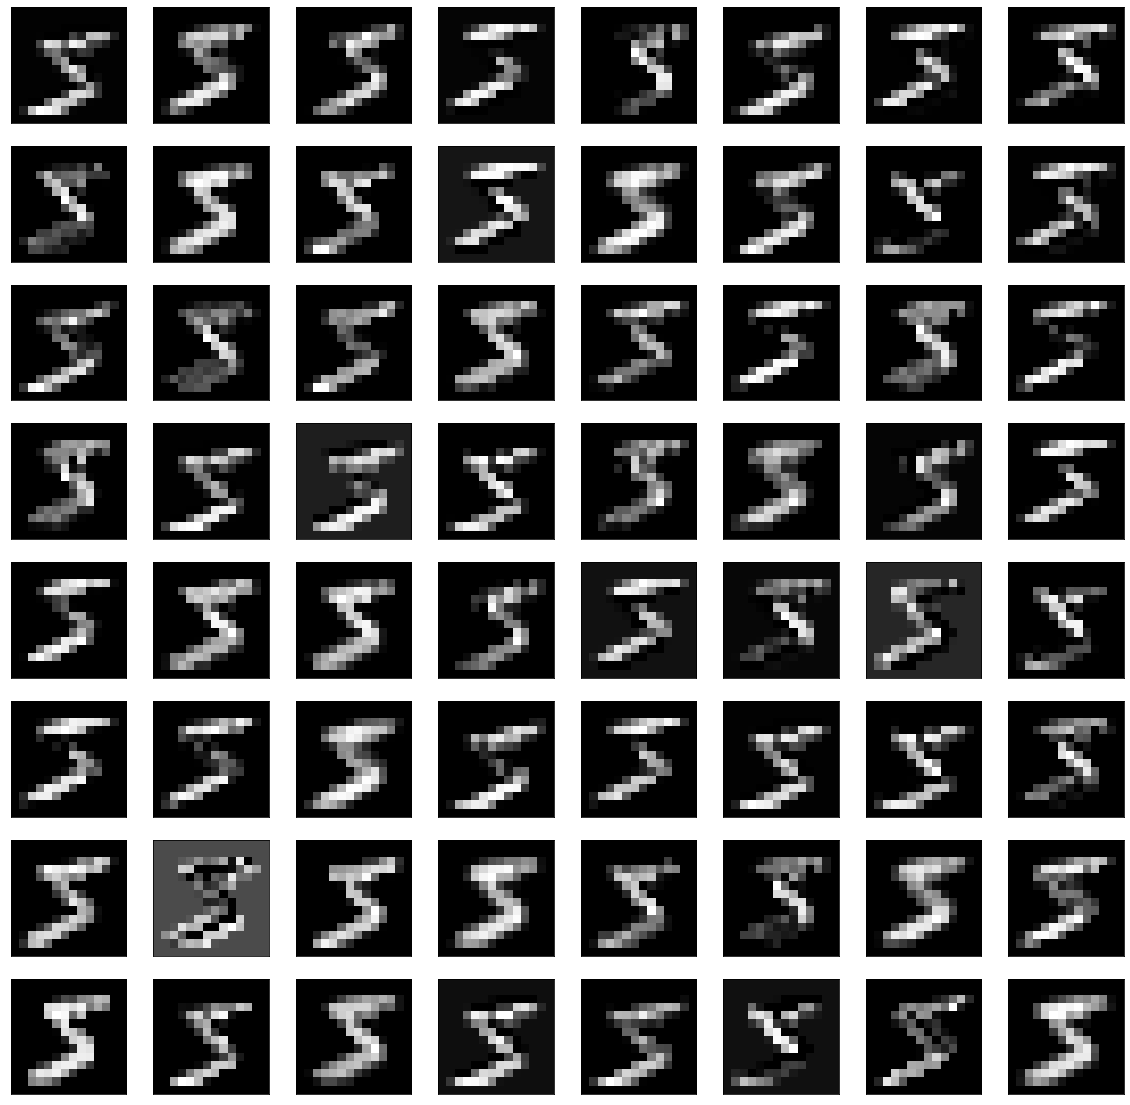

In [12]:
from numpy import expand_dims
from tensorflow.keras.models import Model

# redefine model to output right after the first hidden layer # you can change here the selected layer
model1 = Model(inputs=model.inputs, outputs=model.layers[1].output)
model1.summary()
# load the image with the required shape # you can change here the selected training/test image 
img = train_images[0]
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# get feature map for first hidden layer; the feature map has dimensions: 
feature_maps = model1.predict(img)
# plot all 64 maps in an 8x8 squares  # if you change the number of layers in the model you may need to change here the squares: their product should be equal to the number of feature maps in the layer that you have selected
square1 = 8
square2 = 8
ix = 1

plt.imshow(img[0][:,:,0], cmap=plt.cm.gray)


figure = plt.figure(figsize=(20, 20))
for _ in range(square1):
	for _ in range(square2):
		# specify subplot and turn of axis
		ax = figure.add_subplot(square1, square2, ix, xticks=[], yticks=[])
    # Display each image
		# plot filter channel in grayscale
		ax.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()

## Try/Check the following (in random order)

1) Standardization vs Normalization </br>
2) On 'Importing Dataset' uncomment the comments that are coverting the values for color 'black' to 255 and for color 'white' to 0  </br>
3) Changing the number of feature maps in each conv layer </br>
4) Adding more layers to the network (conv, pooling, dense layers) </br>
5) Uncommenting the commented code that adds dropout regularization: experiment with putting dropout after various layers of the CNN and also changing its rate parameter </br>
5) Using 'SAME' instead of 'VALID' padding  </br>
5) Using different activation functions </br>
6) Using different optimizers </br>
7) Using different learning rates </br>
8) Using different batch size (what's the difference in the performance and in the training time) </br>
9) Train for more epochs </br>


